# WeatherPy
----
### Analysis
* Temperature seems to have a clear correlation with latitude
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). The southern hemisphere tends to be warmer this time of year than the northern hemisphere
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities near 0, 80, and 90% cloudiness
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind
* Wind speed tends to generally be betweeen 0 and 15 mph regardless of latitude
* There is no strong relationship between latitude and humidity. however there is a slightly larger cluster of northern hemisphere cities with high humidity (above 60% humidity)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | monterey
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | kapaa
City not found. Skipping...
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | nautanwa
Processing Record 8 of Set 1 | severo-kurilsk
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | bilma
Processing Record 11 of Set 1 | lavrentiya
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | kupang
Processing Record 18 of Set 1 | galeana
City not found. Skipping...
Processing Record 19 of Set 1 | wewak
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | ponta do sol
Processing Record 23 of Set 1 | 

Processing Record 42 of Set 4 | ostrovnoy
Processing Record 43 of Set 4 | mareeba
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | williams lake
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | hami
Processing Record 49 of Set 4 | tuatapere
Processing Record 1 of Set 5 | marquette
Processing Record 2 of Set 5 | norrtalje
Processing Record 3 of Set 5 | martapura
Processing Record 4 of Set 5 | san quintin
Processing Record 5 of Set 5 | madimba
City not found. Skipping...
Processing Record 6 of Set 5 | omboue
Processing Record 7 of Set 5 | murray bridge
Processing Record 8 of Set 5 | lata
Processing Record 9 of Set 5 | puerto quijarro
Processing Record 10 of Set 5 | vanimo
Processing Record 11 of Set 5 | ilhabela
Processing Record 12 of Set 5 | belyy
Processing Record 13 of Set 5 | syasstroy
Processing Record 14 of Set 5 | harbour breton
Processing Record 15 of Set 5 | karasuk
Processing Record 16 of

Processing Record 34 of Set 8 | boyolangu
Processing Record 35 of Set 8 | fort nelson
City not found. Skipping...
Processing Record 36 of Set 8 | matagami
Processing Record 37 of Set 8 | bow island
Processing Record 38 of Set 8 | chihuahua
Processing Record 39 of Set 8 | rambouillet
Processing Record 40 of Set 8 | ancud
Processing Record 41 of Set 8 | natal
City not found. Skipping...
Processing Record 42 of Set 8 | australind
City not found. Skipping...
Processing Record 43 of Set 8 | padang
Processing Record 44 of Set 8 | brae
Processing Record 45 of Set 8 | santa cruz
Processing Record 46 of Set 8 | vostok
Processing Record 47 of Set 8 | oistins
Processing Record 48 of Set 8 | pryazha
Processing Record 49 of Set 8 | odesskoye
Processing Record 1 of Set 9 | zyryanka
Processing Record 2 of Set 9 | clinton
Processing Record 3 of Set 9 | smidovich
City not found. Skipping...
Processing Record 4 of Set 9 | horta
Processing Record 5 of Set 9 | tahoua
City not found. Skipping...
Processing

Processing Record 17 of Set 12 | tete
City not found. Skipping...
Processing Record 18 of Set 12 | pangkalanbuun
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [10]:
# establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [11]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,75,AR,1575485470,45,-51.62,-69.23,64.40,28.86
1,monterey,90,US,1575485432,93,36.60,-121.89,57.99,2.17
2,mar del plata,0,CN,1575485470,16,29.86,90.73,9.84,3.36
3,kapaa,40,US,1575485297,83,22.08,-159.32,75.20,13.87
4,ushuaia,75,AR,1575485470,76,-54.81,-68.31,60.80,29.97


In [12]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

FileNotFoundError: [Errno 2] No such file or directory: '../Output/weather_df.csv'

In [13]:
weather_dataframe.count()

City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [14]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,puerto ayora,75,AR,1575485470,45,-51.62,-69.23,64.40,28.86
1,monterey,90,US,1575485432,93,36.60,-121.89,57.99,2.17
2,mar del plata,0,CN,1575485470,16,29.86,90.73,9.84,3.36
3,kapaa,40,US,1575485297,83,22.08,-159.32,75.20,13.87
4,ushuaia,75,AR,1575485470,76,-54.81,-68.31,60.80,29.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

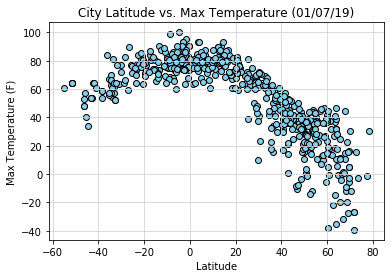

In [15]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

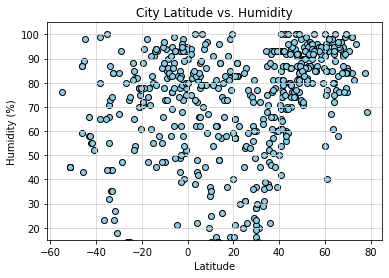

In [19]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

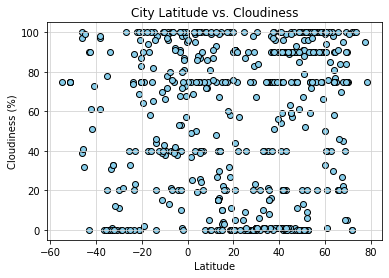

In [20]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

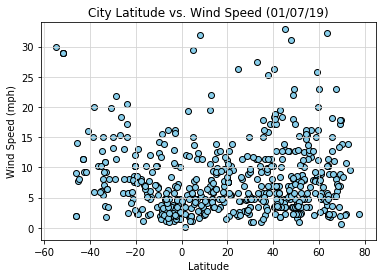

In [18]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()